# Model Training

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [32]:
df = pd.read_csv('data\stud.csv')

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df['total_percentage'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3
df['total_percentage'] = df['total_percentage'].round(2)

In [35]:
X = df.drop(columns=['math_score', 'reading_score', 'writing_score', 'total_percentage'])
y = df['total_percentage']

In [36]:
# numerical features

numerical_features = X.select_dtypes(exclude='object').columns

# categorical features

categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('ohe', oh_transformer, categorical_features),
    ('scaler', numeric_transformer, numerical_features)
])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape   

((800, 12), (200, 12), (800,), (200,))

In [ ]:
## Create evalute function to give all metrics after training the model

def evaluate_model(true, predict):
    mse = mean_squared_error(true, predict)
    mae = mean_absolute_error(true, predict)
    r2 = r2_score(true, predict)
    rmse = np.sqrt(mse)

    return mae, rmse, r2

In [39]:
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'AdaBoost' : AdaBoostRegressor(),
    'Support Vector Machine' : SVR(),
    'CatBoost' : CatBoostRegressor(verbose=0),
    'XGBoost' : XGBRegressor(),
}

In [42]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.1956
- Mean Absolute Error: 148.7321
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.4017
- Mean Absolute Error: 179.6053
- R2 Score: 0.1622


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 12.1957
- Mean Absolute Error: 148.7357
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 13.4069
- Mean Absolute Error: 179.7448
- R2 Score: 0.1615


Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 13.1964
- Mean Absolute Error: 174.1438
- R2 Score: 0.1269
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.1339
- Mean Absolute Error: 199.7668
- R2 Score: 0.0681


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 10.8647
- Mean Absolute Error: 118.0414
- R2 Sc

In [43]:
### Results

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,Linear Regression,0.162171
1,Ridge Regression,0.161521
6,Support Vector Machine,0.118803
5,AdaBoost,0.106908
2,Lasso Regression,0.068121
7,CatBoost,-0.002639
8,XGBoost,-0.036288
4,Random Forest,-0.039850
3,Decision Tree,-0.078719


In [44]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)

y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)
print(f'R2 Score for Linear Regression: {score:.4f}')

R2 Score for Linear Regression: 0.1622


Text(0, 0.5, 'Predicted')

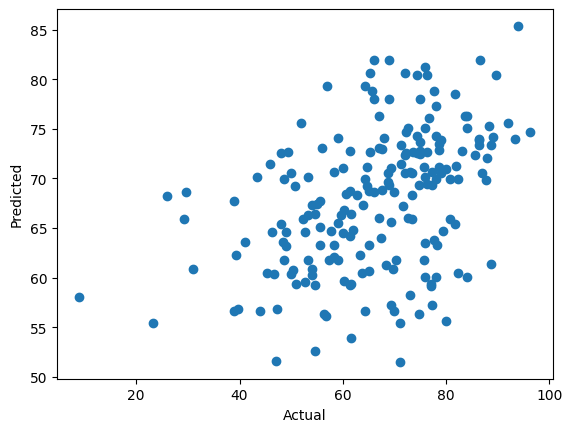

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

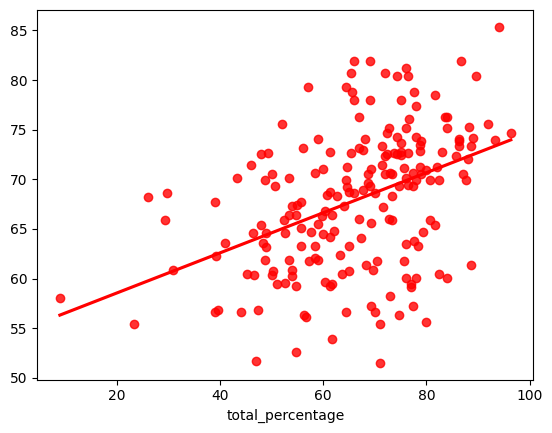

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');